# Importing Data & Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from config import *

players_df = pd.read_csv(f"{folder_path}/players.csv")

# Data Preparation of Players

In [2]:
players_df.shape

(30302, 23)

In [3]:
players_df.head(10)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,...,NaN,NaN,NaN,10000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,...,NaN,NaN,NaN,12000000.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,...,NaN,NaN,NaN,2750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,...,right,173.0,NaN,10500000.0,NaN,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,...,left,177.0,NaN,17000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC
5,3614,Tony,Hibbert,Tony Hibbert,2015,29,tony-hibbert,England,Liverpool,England,...,right,173.0,NaN,4500000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tony-hibbert/p...,GB1,Everton FC
6,3804,Carlo,Nash,Carlo Nash,2013,1123,carlo-nash,England,Bolton,England,...,right,197.0,NaN,800000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/carlo-nash/pro...,GB1,Norwich City
7,4042,Brad,Jones,Brad Jones,2017,234,brad-jones,Australia,Armadale,Australia,...,left,194.0,100000.0,2000000.0,2023-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/brad-jones/pro...,NL1,Feyenoord Rotterdam
8,4112,Rory,Delap,Rory Delap,2012,512,rory-delap,England,Sutton Coldfield,Ireland,...,right,183.0,NaN,5500000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/rory-delap/pro...,GB1,Stoke City
9,4133,Richie,Ryan,Richie Ryan,2012,1519,richie-ryan,Ireland,Tipperary,Ireland,...,both,178.0,NaN,350000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/richie-ryan/pr...,SC1,Dundee United FC


In [4]:
players_df = players_df.set_index('player_id')

In [5]:
# handling NA values
players_df.isna().sum()

first_name                               1965
last_name                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_birth                         2689
city_of_birth                            2203
country_of_citizenship                    543
date_of_birth                              47
sub_position                              172
position                                    0
foot                                     2389
height_in_cm                             2098
market_value_in_eur                     10919
highest_market_value_in_eur              1321
contract_expiration_date                11467
agent_name                              15361
image_url                                   0
url                                         0
current_club_domestic_competition_id        0
current_club_name                 

In [6]:
# removing NA rows for date_of_birth
players_df = players_df.loc[~players_df['date_of_birth'].isna()]

# setting NA heights to a medium height value
players_df.loc[players_df['height_in_cm'].isna(), 'height_in_cm'] = players_df['height_in_cm'].mean()

# setting NA market values to 0
players_df.loc[players_df['market_value_in_eur'].isna(), 'market_value_in_eur'] = 0
players_df.loc[players_df['highest_market_value_in_eur'].isna(), 'highest_market_value_in_eur'] = 0

# removing columns contract and agent
players_df.drop(columns=['contract_expiration_date', 'agent_name'], inplace=True)


players_df.isna().sum()

first_name                              1965
last_name                                  0
name                                       0
last_season                                0
current_club_id                            0
player_code                                0
country_of_birth                        2673
city_of_birth                           2187
country_of_citizenship                   542
date_of_birth                              0
sub_position                             167
position                                   0
foot                                    2375
height_in_cm                               0
market_value_in_eur                        0
highest_market_value_in_eur                0
image_url                                  0
url                                        0
current_club_domestic_competition_id       0
current_club_name                          0
dtype: int64

In [7]:
# searching duplicates
players_df.loc[players_df.duplicated()]

,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,image_url,url,current_club_domestic_competition_id,current_club_name
player_id,,,,,,,,,,,,,,,,,,,,


In [8]:
players_df.dtypes

first_name                               object
last_name                                object
name                                     object
last_season                               int64
current_club_id                           int64
player_code                              object
country_of_birth                         object
city_of_birth                            object
country_of_citizenship                   object
date_of_birth                            object
sub_position                             object
position                                 object
foot                                     object
height_in_cm                            float64
market_value_in_eur                     float64
highest_market_value_in_eur             float64
image_url                                object
url                                      object
current_club_domestic_competition_id     object
current_club_name                        object
dtype: object

In [10]:
# converting data types
players_df['height_in_cm'] = players_df['height_in_cm'].astype('int64')

players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])

In [11]:
players_df.dtypes

first_name                                      object
last_name                                       object
name                                            object
last_season                                      int64
current_club_id                                  int64
player_code                                     object
country_of_birth                                object
city_of_birth                                   object
country_of_citizenship                          object
date_of_birth                           datetime64[ns]
sub_position                                    object
position                                        object
foot                                            object
height_in_cm                                     int64
market_value_in_eur                            float64
highest_market_value_in_eur                    float64
image_url                                       object
url                                             object
current_cl

In [12]:
# adding columns to the dataframe
players_df['height_in_m'] = players_df['height_in_cm']/100

players_df['market_value_mln'] = players_df['market_value_in_eur']/1e6
players_df['highest_market_value_mln'] = players_df['highest_market_value_in_eur']/1e6

# age column
from datetime import datetime
time_difference = (datetime.now() - pd.to_datetime(players_df['date_of_birth']))
players_df["age"] = (time_difference.dt.days // 365)


players_df

,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,...,market_value_in_eur,highest_market_value_in_eur,image_url,url,current_club_domestic_competition_id,current_club_name,height_in_m,market_value_mln,highest_market_value_mln,age
player_id,,,,,,,,,,,,,,,,,,,,,
598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,1979-04-05,...,0.0,10000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt,1.82,0.000,10.000,45
670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,1979-01-15,...,0.0,12000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona,1.82,0.000,12.000,45
1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,1982-09-06,...,0.0,2750000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt,1.82,0.000,2.750,41
3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,1983-01-15,...,0.0,10500000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City,1.73,0.000,10.500,41
3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,1979-03-02,...,0.0,17000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC,1.77,0.000,17.000,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,1999-02-05,...,10000000.0,10000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio,1.90,10.000,10.000,25
537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,Italy,2001-09-01,...,325000.0,350000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/semuel-pizzign...,IT1,Udinese Calcio,1.88,0.325,0.350,22
586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,...,4500000.0,4500000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio,1.80,4.500,4.500,21


In [13]:
# renaming columns
players_df = players_df.rename(columns={
    'name':'full_name',
    'current_club_id':'club_id',
    'country_of_citizenship':'nationality',
    'current_club_domestic_competition_id':'league_id',
    'current_club_name':'club_name',
    'url':'player_profile_url'
})

players_df

,first_name,last_name,full_name,last_season,club_id,player_code,country_of_birth,city_of_birth,nationality,date_of_birth,...,market_value_in_eur,highest_market_value_in_eur,image_url,player_profile_url,league_id,club_name,height_in_m,market_value_mln,highest_market_value_mln,age
player_id,,,,,,,,,,,,,,,,,,,,,
598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,1979-04-05,...,0.0,10000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt,1.82,0.000,10.000,45
670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,1979-01-15,...,0.0,12000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona,1.82,0.000,12.000,45
1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,1982-09-06,...,0.0,2750000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt,1.82,0.000,2.750,41
3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,1983-01-15,...,0.0,10500000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City,1.73,0.000,10.500,41
3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,1979-03-02,...,0.0,17000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC,1.77,0.000,17.000,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371851,Jaka,Bijol,Jaka Bijol,2023,410,jaka-bijol,Slovenia,Vuzenica,Slovenia,1999-02-05,...,10000000.0,10000000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jaka-bijol/pro...,IT1,Udinese Calcio,1.90,10.000,10.000,25
537171,Semuel,Pizzignacco,Semuel Pizzignacco,2018,410,semuel-pizzignacco,Italy,Monfalcone,Italy,2001-09-01,...,325000.0,350000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/semuel-pizzign...,IT1,Udinese Calcio,1.88,0.325,0.350,22
586756,Festy,Ebosele,Festy Ebosele,2023,410,festy-ebosele,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,...,4500000.0,4500000.0,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/festy-ebosele/...,IT1,Udinese Calcio,1.80,4.500,4.500,21


In [15]:
players_df['sub_position'].value_counts()

sub_position
Centre-Back           5302
Centre-Forward        4261
Central Midfield      3516
Goalkeeper            3467
Defensive Midfield    2490
Right-Back            2205
Left-Back             2136
Attacking Midfield    2041
Left Winger           1892
Right Winger          1855
Left Midfield          373
Right Midfield         333
Second Striker         217
Name: count, dtype: int64

In [24]:
# checking variable height
players_df['height_in_m'].describe()

count    30255.000000
mean         1.822181
std          0.065951
min          0.180000
25%          1.780000
50%          1.820000
75%          1.870000
max          2.070000
Name: height_in_m, dtype: float64

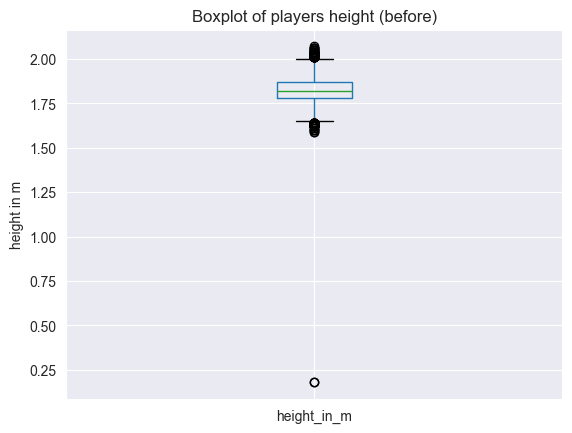

In [24]:
# check for height outliers
ax = players_df.boxplot(column='height_in_m')
ax.set_title('Boxplot of players height (before)')
plt.ylabel('height in m')
plt.show()

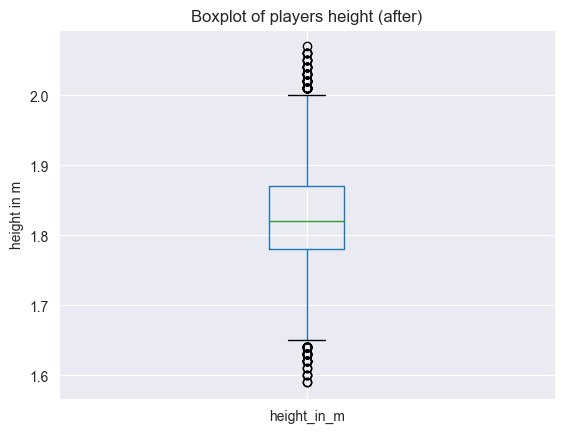

In [25]:
# remove height outliers
players_df = players_df.loc[players_df['height_in_m']>1]

# boxplot after
ax = players_df.boxplot(column='height_in_m')
ax.set_title('Boxplot of players height (after)')
plt.ylabel('height in m')
plt.show()

In [38]:
players_with_value = players_df.query('market_value_mln > 0')
players_with_value['market_value_mln'].describe()

count    19380.000000
mean         2.235047
std          7.341204
min          0.010000
25%          0.175000
50%          0.350000
75%          1.000000
max        180.000000
Name: market_value_mln, dtype: float64

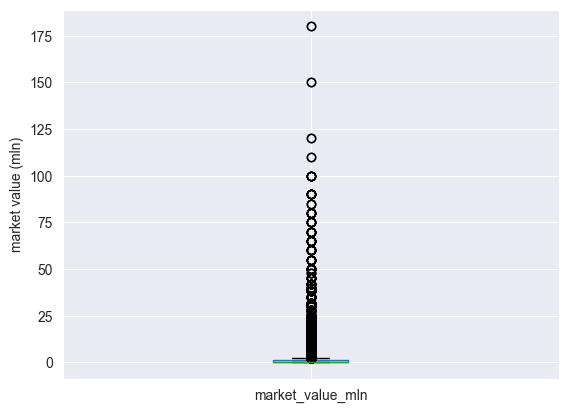

In [39]:
players_with_value.boxplot(column='market_value_mln')
plt.ylabel('market value (mln)')
plt.show()

In [40]:
# selezioniamo solo i giocatori ancora in attività
current_players = players_df.query('last_season == 2023')

Media di age: 26.15


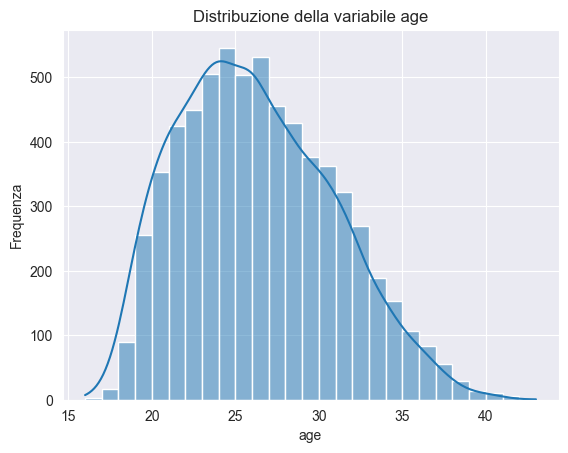

In [41]:
df = current_players
var = 'age'

mean_value = df[var].mean()
print(f"Media di {var}: {mean_value:.2f}")

sns.histplot(data=df, x=var, kde=True, bins=27)
plt.title(f'Distribuzione della variabile {var}')
plt.xlabel(f'{var}')
plt.ylabel('Frequenza')
plt.show()

Media di height_in_m: 1.83


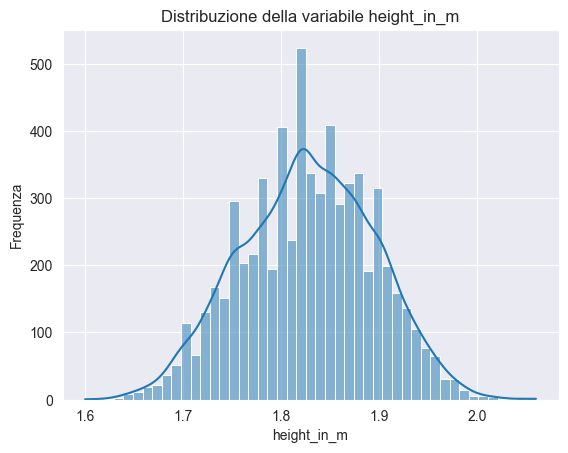

In [42]:
df = current_players
var = 'height_in_m'

mean_value = df[var].mean()
print(f"Media di {var}: {mean_value:.2f}")

sns.histplot(data=df, x=var, kde=True, bins=47)
plt.title(f'Distribuzione della variabile {var}')
plt.xlabel(f'{var}')
plt.ylabel('Frequenza')
plt.show()

Media di market_value_mln: 5.33


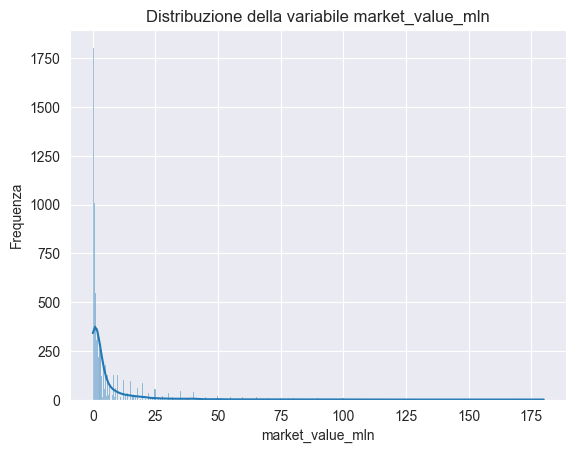

In [43]:
df = current_players.query('market_value_mln > 0')
var = 'market_value_mln'

mean_value = df[var].mean()
print(f"Media di {var}: {mean_value:.2f}")

sns.histplot(data=df, x=var, kde=True)
plt.title(f'Distribuzione della variabile {var}')
plt.xlabel(f'{var}')
plt.ylabel('Frequenza')
plt.show()

In [44]:
# multivariate analysis
current_players[['market_value_mln','highest_market_value_mln']].corr()

,market_value_mln,highest_market_value_mln
market_value_mln,1.000000,0.852867
highest_market_value_mln,0.852867,1.000000


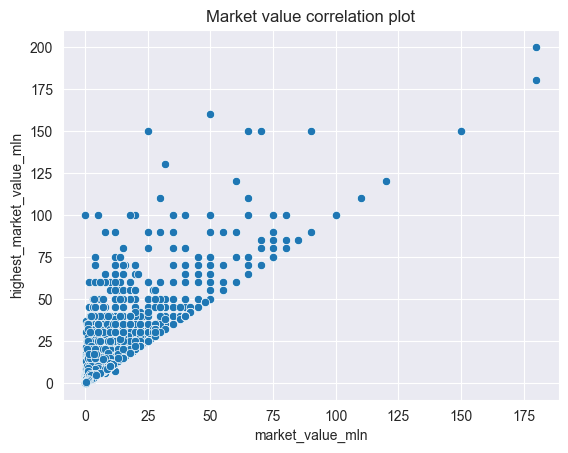

In [45]:
sns.scatterplot(data=current_players, x='market_value_mln', y='highest_market_value_mln')
plt.title("Market value correlation plot")
plt.show()

In [46]:
# correzione dei valori sbagliati di highest_market_value
wrong_market_value = players_df.query("highest_market_value_mln < market_value_mln")
players_df.loc[wrong_market_value.index, 'highest_market_value_mln'] = wrong_market_value['market_value_mln']

In [47]:
players_df.query("highest_market_value_mln < market_value_mln")

,first_name,last_name,full_name,last_season,club_id,player_code,country_of_birth,city_of_birth,nationality,date_of_birth,...,market_value_in_eur,highest_market_value_in_eur,image_url,player_profile_url,league_id,club_name,height_in_m,market_value_mln,highest_market_value_mln,age
player_id,,,,,,,,,,,,,,,,,,,,,


# Saving processed data to feather file

In [49]:
current_players.to_feather('../cleaned_data/players.feather')